<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Week 3 Lecture 2</div>
<div style="text-align: right">Dino Konstantopoulos, 15 September 2019</div>

# Key words

random.choices

random.uniform

np.random.rand()

Let's implement a *complete* **Genetic Algorithm** (GA) to do data science: *figure out the curve so that we can throw away the data*.

Let's assume a polynomial curve. There is a theorem in linear algebra that says that you can fit a polynomial of degree $n$ to go through any number of $n$ datapoints.

The problem with polyonmial curves is that they wiggle a lot (well, less than $Fourier$ series, but that is another chapter), so an overfit to the training points may produce wild wiggles and thus wrong results on test data.

For example, this is $2.2{x}^{1}-81.7{x}^{3}+1576.6{x}^{5}-12865{x}^{7}+53760.4{x}^{9}-128928.6{x}^{11}+185521.7{x}^{13}-158630{x}^{15}+74398.9{x}^{17}-14754.5{x}^{19}$:

<br />
<center>
    <img src="images/polynomial.png" width=400 />
</center>

In [8]:
"""
The y=target is to find the w's in this equation:
    y = w3x^3+w2x^2+w1x^1+w0x^0
    such that the curve above passes through 4 points (x1, y1), (x2, y2), (x3, y3), (x4, y4)
    What are the best values for the 4 weights w0 to w3?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation (predetermined)
training_data = [(-4,-200), (-2,-1), (2,4), (4, 200)]

# Number of the weights we are looking to optimize.
num_weights = len(training_data)

"""
Genetic algorithm hyperparameters:
    Mating pool size
    Population size
    Mutation rate
"""
pop = 1000
num_chromosomes = num_weights
chromosome_size = (pop, num_chromosomes)
mutation_rate = 0.1

Let's have fun with our genetic algorithm.

Planet **Berk** is populated by **berkians** with 4 chromosomes $(w_0, w_1, w_2, w_3)$. That is their *genotype*.

<br />
<center>
    <img src="images/berkians.jpg" width=600 />
</center>

Their *phenotype* is the value of $y = w_3x^3+w_2x^2+w_1x^1+w_0x^0$

Berkians are just a much simpler version of humans. *Your* genotype is your DNA. *Your* phenotype is how pretty you look, how strong you are, how smart, how psychologically stable, etc.

Berkians *also* have a notion of *prettyness*, or ***fitness***: Given 4 points $(x, y)$ determined by the berkian god, it is the total value of the absolute value of their phenotype minus $y$, for each $x$: $$\sum_{i=0, 4} |y_ i - (w_3x_i^3+w_2x_i^2+w_1x_i^1+w_0x_i^0) |$$ 

In other words, prettyness/fitness for a berkian is that their chromosome weights are as close as possible to the coefficients of our desired polynomial curve: the one that goes through our predetermined 4 points.

<br />
<center>
    <img src="images/mirror.jpg" width=600 />
</center>

Berkians have sex in the following way: The prettiest berkians select the prettiest berkians and they have sex and a new berkian is born that shares the first half of the chromosomes of the first berkian and the second half of the chromosomes of the second berkian.

Berkians (like us) live under a sun that has solar flares that sends radioactivity over to planet Berk, which produces random mutations in the berkian chromosome. Random mutations replace one of the chromosomes, picked randomly, in the berkian genotype with a random number.

Berkians, like americans, want to produce a **Marilyn Monroe** for their version of Hollywood to help us with our data science. So they want to have lots of sex and sit at the beach for long tanning sessions in order to produce the prettiest berkian under their sun, as determined by their berkian god.

<br />
<center>
    <img src="images/hollywood.jpg" width=600 />
</center>

How many generations will it take for berkians to get close to their **Marilyn Monroe** dream, and solve our data science? 

There are *hyperparamater* in the berkian universe (leading to many parallel berkian universes, for each value of the hyperparameters), kind of like in Star Trek parallel universes. It is how often random mutations happen under the berkian sun, the size of the berkian population, the number of berkian chromosomes. For the simplest possible parallel universe, we will assume one random mutation per generation on a random index of the berkian genotype.

In [9]:
from random import choices
import random

def and_god_created_berkians(how_many):
    berkians = []
    for berk in range(how_many):
        berk = []
        for i in range(4):
            chromosome = random.uniform(-5., 5.)
            berk.append(chromosome)
        berkians.append(berk)
    return berkians
    
def phenotype(genes, x):
    y = genes[3] * x**3 + genes[2] * x**2 + genes[1] * x**1 + genes[0] * x**0
    return y

def berk_fitness(list_of_points, berk):
    # Calculating the fitness value of a berkian, best possible fitness is infinity
    fitness = 0
    for x,y in list_of_points:
        fitness += 1. / (y - phenotype(berk, x))**2
    return fitness

def planet_berk_fitness(list_of_points, berkians):
    fitnesses = []
    for berk in berkians:
        fitnesses.append(berk_fitness(list_of_points, berk))
    return fitnesses

def planet_berk_average_fitness(list_of_points, berkians):
    fitness = 0
    for berk in berkians:
        fitness += berk_fitness(list_of_points, berk)
    return fitness / len(berkians)

def planet_berk_top_fittest(list_of_points, berkians, how_many):
    # Returning the top fittest berkians
    fitness = []
    for berk in berkians:
        fitness.append(berk_fitness(list_of_points, berk))
    
    top_fittest = []
    for i in range(int(how_many)):
        fittest = 0
        for y in fitness:
            if y > fittest:
                fittest = i
        
        top_fittest.append(berkians[i])
        fitness[i] = 0
        
    return top_fittest

def select_berk_mating_pool_2(list_of_points, berkians, percent):
    # Selecting the best berkians in the current generation as parents 
    # for producing the offspring in the next generation. Pick
    # the top percent%
    return planet_berk_top_fittest(list_of_points, berkians, len(berkians) * percent)

def crossover2(parents):
    offspring = []
    
    # The point at which crossover takes place between two parent berkians. Usually, it is at the center.
    crossover_point = 2

    for i in range(len(parents)):
        couple = choices(range(len(parents)), k=2)
        baby_berk = [0,0,0,0]
        
        # Index of the first parent to mate.
        parent1_idx = couple[0]
        
        # Index of the second parent to mate.
        parent2_idx = couple[1]
        
        # The new offspring will have its first half of its genes taken from the first parent.
        baby_berk[0:crossover_point] = parents[parent1_idx][0:crossover_point]
        
        # The new offspring will have its second half of its genes taken from the second parent.
        baby_berk[crossover_point:] = parents[parent2_idx][crossover_point:]
        
        # add baby_berk to the offspring generation
        offspring.append(baby_berk)
        
    return offspring

def mutation2(parents, num_mutations=1):
    for parent in parents:
        for mutation in range(num_mutations):
            mutation_location = choices(range(4), k=1)[0]
            mutation = random.uniform(-1., 1.)
            parent[mutation_location] += mutation
            
    return parents

## Parent selection

Parent Selection is the process of selecting berkian parents which mate and recombine to create berkian offspring for the next generation. Parent selection is very crucial to the convergence rate of the GA as good parents drive individuals to a better and fitter solutions.

However, care should be taken to prevent one extremely fit solution from taking over the entire population in a few generations, as this leads to the solutions being close to one another in the solution space thereby leading to a loss of ***diversity***. Maintaining good diversity in the population is extremely crucial for the success of a GA. This taking up of the entire population by one extremely fit solution is known as ***premature convergence** and is an undesirable condition in a GA.

***Fitness Proportionate Selection*** is one of the most popular ways of parent selection. In this every berkian can become a parent with a probability which is proportional to its fitness. Therefore, fitter berkians have a higher chance of mating and propagating their features to the next generation. Therefore, such a selection strategy applies a selection pressure to the more fit individuals in the population, evolving better individuals over time.

Consider a circular wheel. The wheel is divided into $n$ pies, where $n$ is the number of berkians on planet Berk. Each berkian gets a portion of the circle which is proportional to its fitness value.

In a roulette wheel selection, the circular wheel is divided as described before. A fixed point is chosen on the wheel circumference as shown and the wheel is rotated. The region of the wheel which comes in front of the fixed point is chosen as the parent. For the second parent, the same process is repeated.

<br />
<center>
    <img src="images/roulette-wheel.png" width=600 />
</center>

It is clear that a fitter berkian has a greater pie on the wheel and therefore a greater chance of landing in front of the fixed point when the wheel is rotated. Therefore, the probability of choosing a berkian depends directly on its fitness.

Implementation wise, we use the following steps −

Calculate $F$ = the sum of all fitnesses, the fitness of the berkian population on planet berk.

Generate a random number $r$ between $0$ and $F$.

Starting from the top of the berkian population, keep adding the finesses to the partial sum $p$.

The individual for which $p$ exceeds $r$ is the chosen individual.

Let's select `num` berkians according to fitness proportionate roulette wheel selection. Those are the berkians that will have sex between each other. We'll mate the first two, then the next two, etc. Let's make sure we always select `num` as an even number.

---
## Note-- Parent selection

The good parent will have higher probability to be select.

---

In [12]:
import numpy as np
def roulette_select(list_of_points, population, num):
    """ Roulette selection, implemented according to:
        <http://stackoverflow.com/questions/177271/roulette
        -selection-in-genetic-algorithms/177278#177278>
    """
    fitnesses = planet_berk_fitness(list_of_points, population)
    total_fitness = float(sum(fitnesses))
    rel_fitness = [f/total_fitness for f in fitnesses]
    
    # Generate probability intervals for each individual
    probs = [sum(rel_fitness[:i+1]) for i in range(len(rel_fitness))]
    
    # Draw new population
    new_population = []
    for n in range(num):
        r = np.random.rand()
        for (i, individual) in enumerate(population):
            if r <= probs[i]:
                new_population.append(individual)
                break
                
    return new_population

---

In [13]:
#Creating the initial berkian population.
#new_population = numpy.random.uniform(low=-10.0, high=10.0, size=chromosome_size)
#print(new_population[0:10, :])

"""
berkians[0] = [2.4,  0.7, 8, -2]
berkians[1] = [-0.4, 2.7, 5, -1]
berkians[2] = [-1,   2,   2, -3]
berkians[3] = [4,    7,   12, 6.1]
berkians[4] = [3.1,  4,   0,  2.4]
berkians[5] = [-2,   3,   -7, 6]
...
"""

berkians = and_god_created_berkians(1000)
berkians[0:10]

[[-1.319389239947629,
  -4.956820884985986,
  -4.378032295801082,
  -4.255733181972068],
 [4.1991114282778685,
  4.361275474494784,
  1.4910955256510983,
  0.5402934189980595],
 [-4.8190815767593795,
  4.378107189192065,
  -2.403630854950806,
  -2.796919105067123],
 [-3.82664196217843, 4.9393606655238, -4.785950871994745, 0.2399867753163143],
 [-0.034193407582553625,
  -0.08975866778243358,
  2.957099821323429,
  -3.87439759979051],
 [-1.6816924944395897,
  -2.984900353864497,
  2.2996612259275553,
  -2.6883993907406802],
 [-3.1443527215995615,
  4.25878863510162,
  1.2345868594765879,
  1.9810520080785397],
 [4.7061681683071654,
  -3.2616275935628436,
  2.899604326341149,
  3.9869853150582184],
 [-1.2698160346857321,
  -0.4194799306601871,
  1.894852178837949,
  -3.803456171561322],
 [-2.4224949827460387,
  -1.6411141045404354,
  1.8580841042696346,
  -3.6820166417072784]]

In [14]:
# Return the index of that solution corresponding to the best current fitness
berk_champ_0 = planet_berk_top_fittest(training_data, berkians, 1)[0]

num_generations = 1000
for generation in range(num_generations):
    print("Generation: " + str(generation) + ", fitness: " + str(planet_berk_average_fitness(training_data, berkians)))
    
    # Selecting the best parents in the population for mating
    #fittest_berkians = select_berk_mating_pool_2(training_data, berkians, .2)
    fittest_berkians = roulette_select(training_data, berkians, 200)

    # Sex: Generating next generation using crossover
    baby_berks = crossover2(fittest_berkians)
    
    # Mix new generation with old generation, preserving parents
    for i in range(len(baby_berks)):
        for j in range(int(len(berkians) * .2)):
            if (berkians[j] not in fittest_berkians):
                berkians[j] = baby_berks[i]
                break

    # Mutation: Adding some variations to next generation using mutation
    berkians = mutation2(berkians)


Generation: 0, fitness: 3.0077619326929366
Generation: 1, fitness: 2.131418086197876
Generation: 2, fitness: 15.997713608376536
Generation: 3, fitness: 27.707479670856657
Generation: 4, fitness: 112.14566586431116
Generation: 5, fitness: 6.347672091902334
Generation: 6, fitness: 341.85262763797317
Generation: 7, fitness: 309.98276775548266
Generation: 8, fitness: 16.086134373513413
Generation: 9, fitness: 77.39699238284612
Generation: 10, fitness: 41.014274955790775
Generation: 11, fitness: 18.342623527386046
Generation: 12, fitness: 16.653557205060032
Generation: 13, fitness: 1217.8967451005074
Generation: 14, fitness: 522.4022094593611
Generation: 15, fitness: 7.819350568135853
Generation: 16, fitness: 11.36271744895185
Generation: 17, fitness: 13.097229109911698
Generation: 18, fitness: 51.148275432687335
Generation: 19, fitness: 132.54961394577975
Generation: 20, fitness: 1025.8442844066087
Generation: 21, fitness: 20.808416932793737
Generation: 22, fitness: 35.75488051911222
Gener

Best solution :  [-0.7358197588589266, 6.497362117614234, 14.460259264462696, -9.180368531990354]
Best solution fitness :  0.018621793711589722
NumPy's polynomial fit:
       3         2
4.062 x - 0.125 x - 15 x + 2


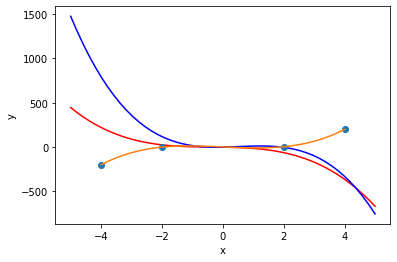

In [16]:
# Return the index of that solution corresponding to the best fitness.
berk_champ = planet_berk_top_fittest(training_data, berkians, 1)[0]

print("Best solution : ", berk_champ)
print("Best solution fitness : ", berk_fitness(training_data, berk_champ))

# plot
import numpy as np
import matplotlib.pyplot
%matplotlib inline
      
x = np.linspace(-5, 5, 50)
y0 = berk_champ_0[3] * x**3 + berk_champ_0[2] * x**2 + berk_champ_0[1] * x**1 + berk_champ_0[0] * x**0
y = berk_champ[3] * x**3 + berk_champ[2] * x**2 + berk_champ[1] * x**1 + berk_champ[0] * x**0
      
matplotlib.pyplot.xlabel("x")
matplotlib.pyplot.ylabel("y")
matplotlib.pyplot.plot(x, y0, color='red')
matplotlib.pyplot.plot(x, y, color='blue')

matplotlib.pyplot.plot(training_data[0][0], training_data[0][1], 'r+')  
matplotlib.pyplot.plot(training_data[1][0], training_data[1][1], 'r+')  
matplotlib.pyplot.plot(training_data[2][0], training_data[2][1], 'r+')  
matplotlib.pyplot.plot(training_data[3][0], training_data[3][1], 'r+')  

# get x and y vectors
points = np.array(training_data)
x = points[:,0]
y = points[:,1]

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)
print("NumPy's polynomial fit:")
print (f)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
matplotlib.pyplot.plot(x,y,'o', x_new, y_new)